# Imports

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.datasets import load_iris
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer


import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

# Data Loading

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis = 1,  inplace = True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# EDA

# 1. Handling Null Values

In [6]:
df.isna().any()

v1    False
v2    False
dtype: bool

In [7]:
df.isna().sum()

v1    0
v2    0
dtype: int64

# 2. Handling Duplicate Values

In [8]:
df['v2'].nunique()

5169

In [9]:
df.shape

(5572, 2)

In [10]:
df['v2'].drop_duplicates(inplace = True)

In [11]:
df.shape

(5572, 2)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 3. Class Distributions

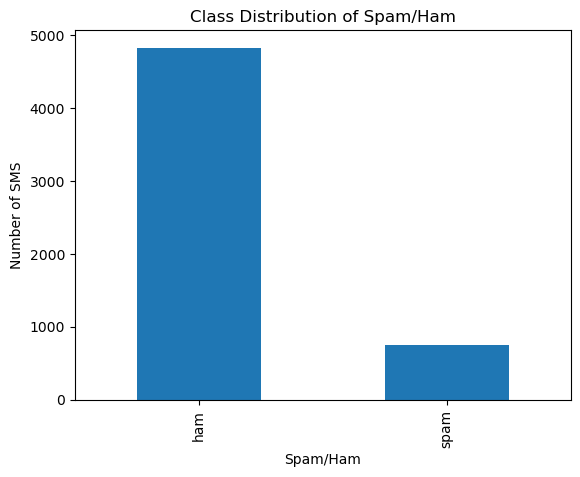

In [13]:
class_counts = df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of SMS')
plt.show()

In [14]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['v2'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [16]:
# Split the text into individual words
words = all_text.split()

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajayboddeda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [19]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

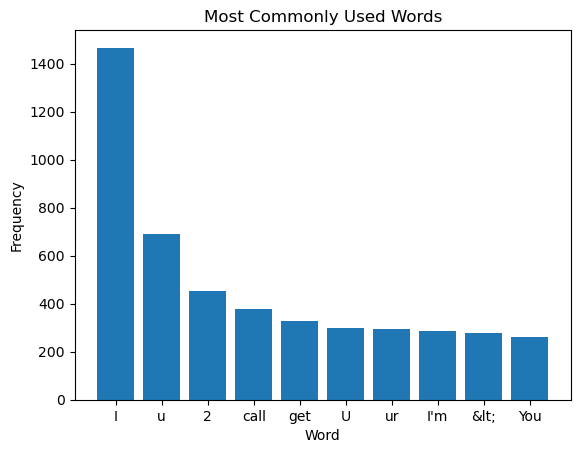

In [20]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# 1. Data Cleaning

In [21]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ajayboddeda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: user 2.68 s, sys: 622 ms, total: 3.3 s
Wall time: 3.3 s


# 2. Feature Extraction

In [24]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model

#    1. Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()

In [27]:
clf.fit(X_train, y_train)

LogisticRegression()

# Predictions

In [28]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

In [29]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [30]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9775784753363229


# Confusion Matrix

<Axes: >

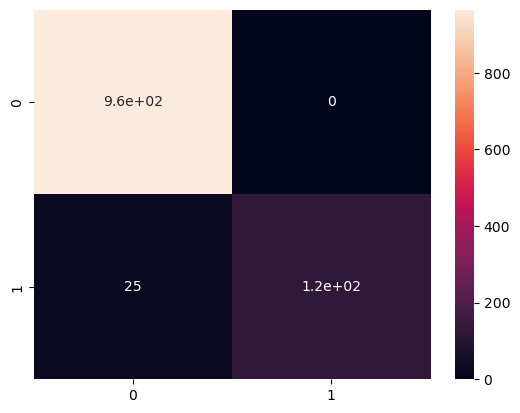

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [32]:
cm

array([[965,   0],
       [ 25, 125]])

In [33]:
import numpy as np

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [35]:
x = np.linspace(-6, 6, 100)

In [36]:
y = sigmoid(x)

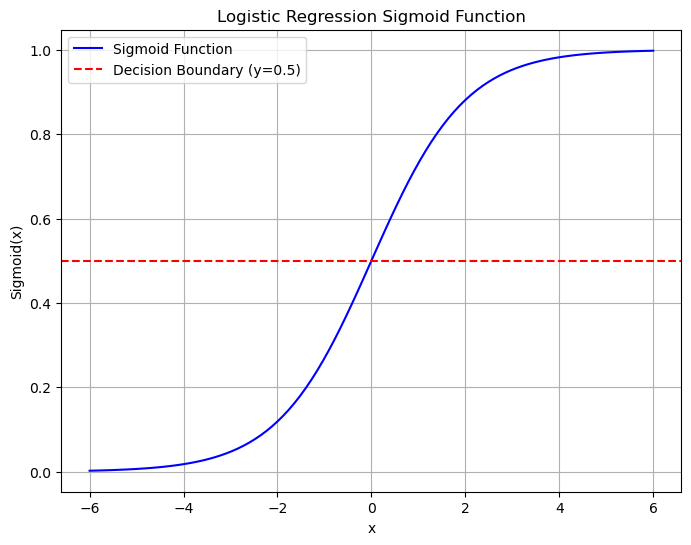

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Logistic Regression Sigmoid Function')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Boundary (y=0.5)')
plt.legend()
plt.grid(True)
plt.show()

# Classification Report

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Naive Bayes 

In [39]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [40]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    text = ' '.join(words)
    return text


In [41]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [42]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [43]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [46]:
# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [47]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9775784753363229


# Classification Report

In [48]:
# Generate and print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.90      0.94      0.92       150

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Confusion Matrix

In [49]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

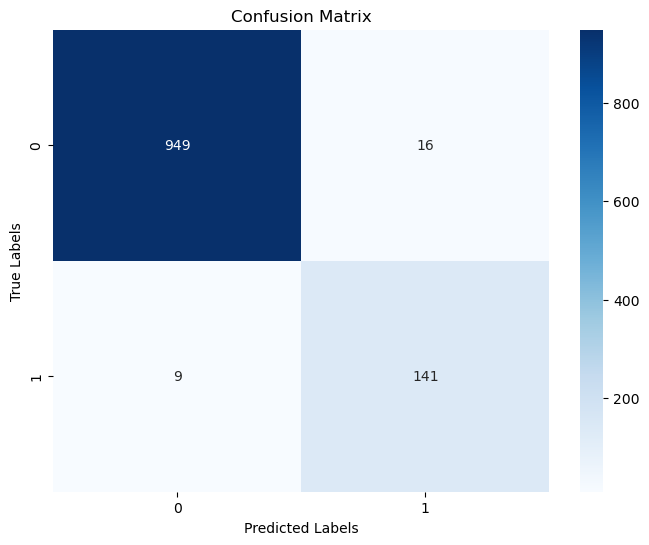

In [50]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [51]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})


In [52]:
# Now you can use 'v1' as the label column for classification
y = df['v1']

# Rest of your code for preprocessing, model training, and evaluation

In [53]:
y_pred_prob = naive_bayes.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

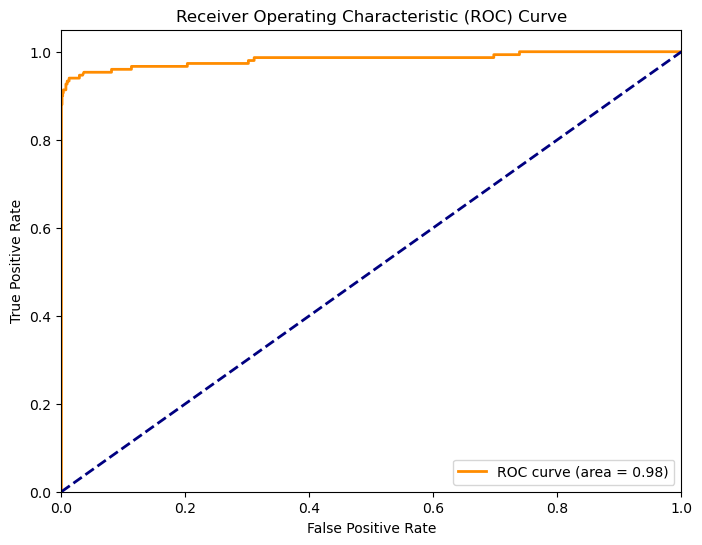

In [54]:

 #Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# SVM

In [55]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [56]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    text = ' '.join(words)
    return text

In [57]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [58]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [59]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Initialize and train the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [62]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [63]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9775784753363229


# Classification Report

In [64]:
# Generate and print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Confusion Matrix

In [65]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

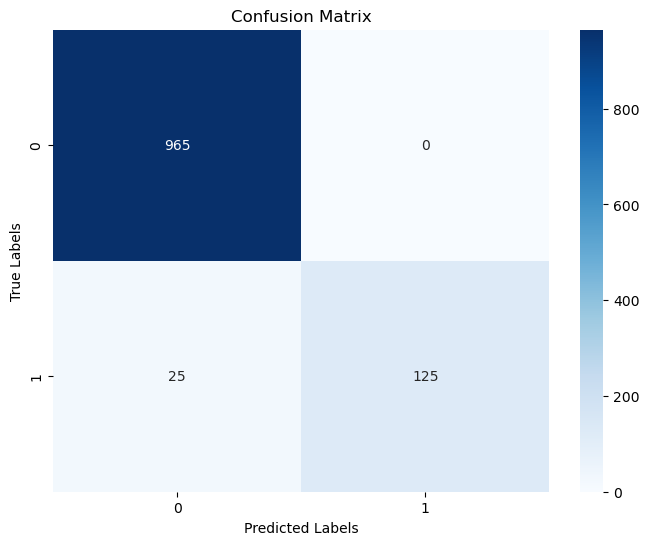

In [66]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [67]:
# Generate ROC curve
y_pred_prob = svm_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

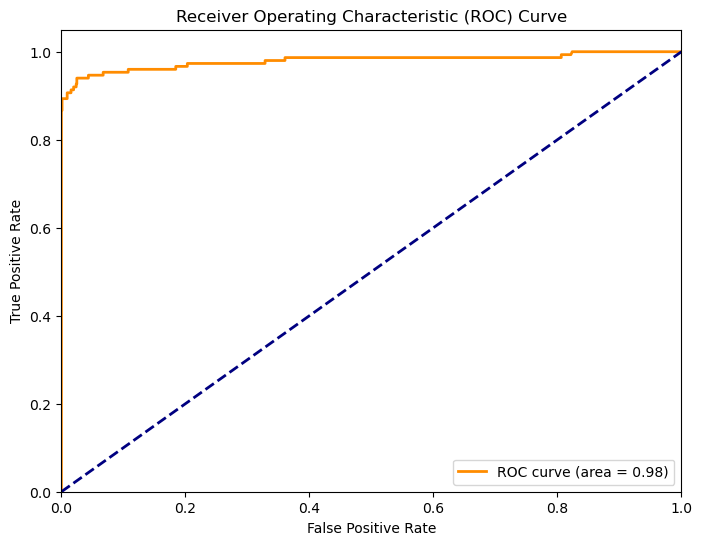

In [68]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision tree

In [69]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [70]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    text = ' '.join(words)
    return text

In [71]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [72]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [73]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

In [77]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9713004484304932


# Classification Report

In [78]:
# Generate and print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.94      0.84      0.89       150

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Confusion Matrix

In [79]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

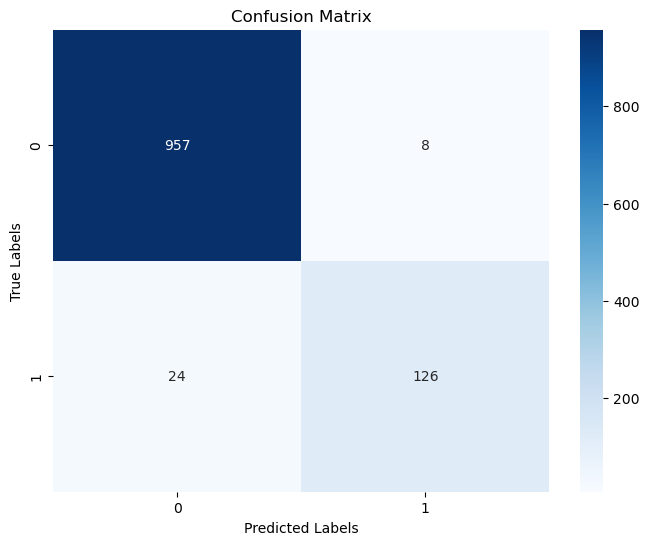

In [80]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [81]:
# Generate ROC curve
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

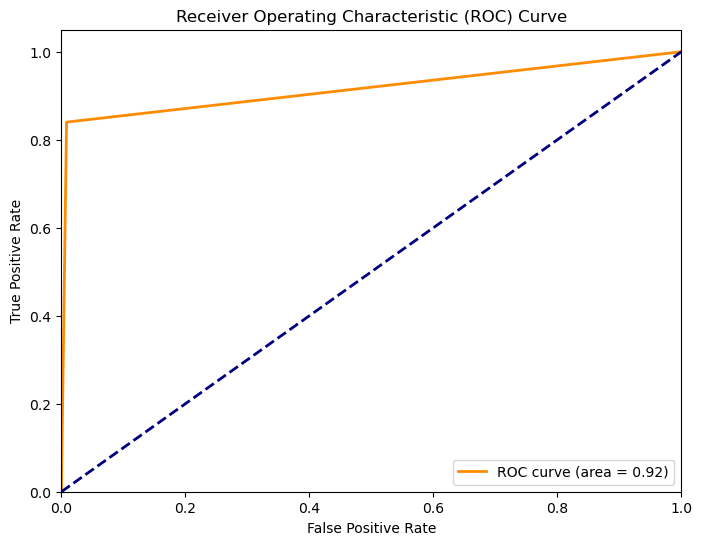

In [82]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# K-NN

In [83]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [84]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    text = ' '.join(words)
    return text

In [85]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [86]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [87]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Initialize and train the KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [91]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210762331838565


# classification Report

In [92]:
# Generate and print a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       1.00      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.96      0.71      0.77      1115
weighted avg       0.93      0.92      0.91      1115



# confusion matrix

In [93]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

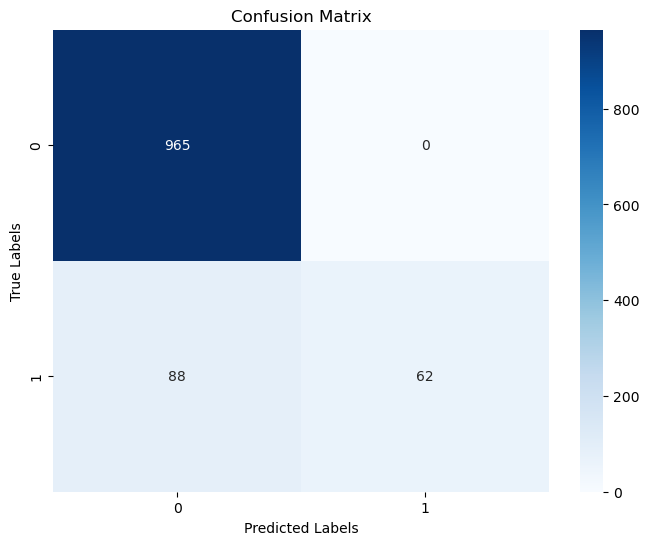

In [94]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [95]:
# Generate ROC curve
y_pred_prob = knn_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

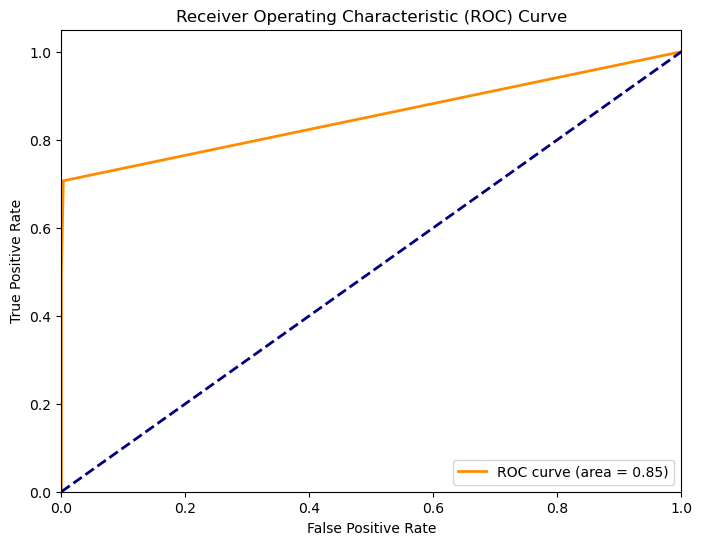

In [96]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [97]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [98]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    text = ' '.join(words)
    return text

In [99]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [100]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [101]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

# Split the data into training and testing sets

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Initialize and train the Random Forest model
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
# Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(X_test)

In [105]:
# Calculate and print accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)


Accuracy (Random Forest): 0.9757847533632287


# Classification Report

In [106]:
# Generate and print a classification report
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



# Confusion Matrix

In [107]:
# Generate a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

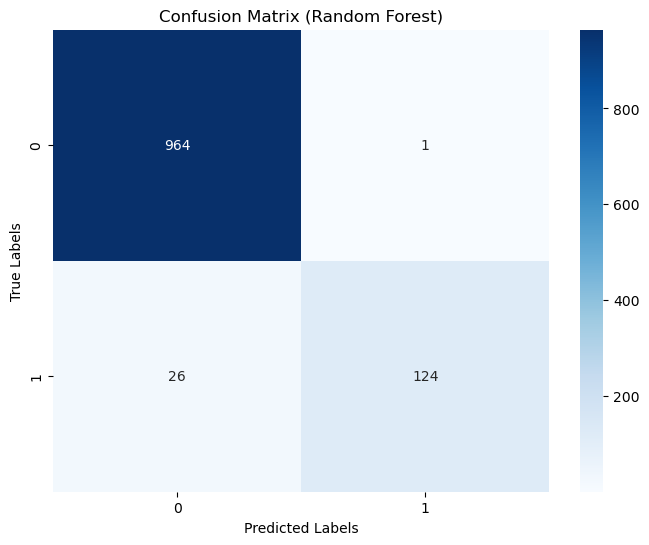

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")  # Corrected line
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [109]:
# Generate ROC curve
y_pred_prob_rf = random_forest_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

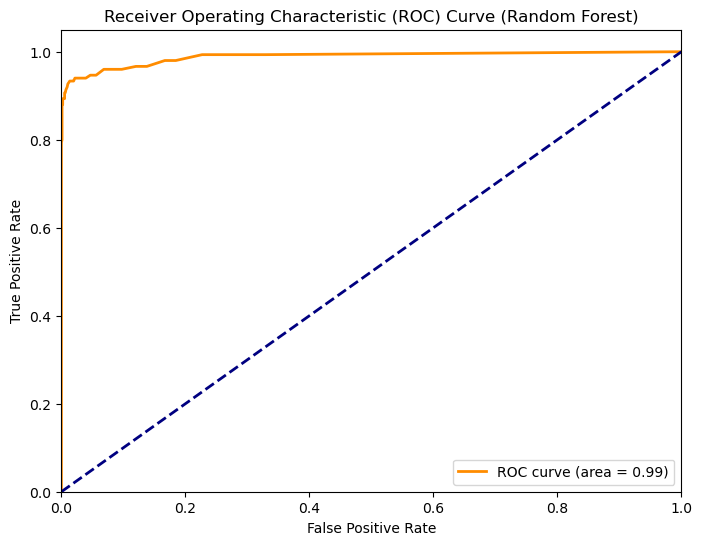

In [110]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

# Ada Boost

In [111]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [112]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    text = ' '.join(words)
    return text

In [113]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [114]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [115]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# Initialize and train the AdaBoost model
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [118]:
# Make predictions on the test set
y_pred_ada = ada_boost_classifier.predict(X_test)

In [119]:
# Calculate and print accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy (AdaBoost):", accuracy_ada)

Accuracy (AdaBoost): 0.9739910313901345


# Classification Report

In [120]:
# Generate and print a classification report
report_ada = classification_report(y_test, y_pred_ada)
print(report_ada)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Confusion Matrix

In [121]:
# Generate a confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

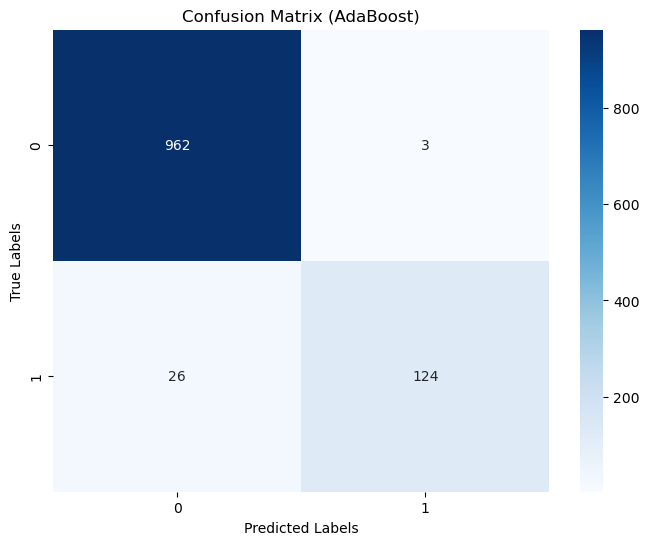

In [122]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (AdaBoost)")
plt.show()

In [123]:
# Generate ROC curve
y_pred_prob_ada = ada_boost_classifier.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_prob_ada, pos_label=1)
roc_auc_ada = auc(fpr_ada, tpr_ada)

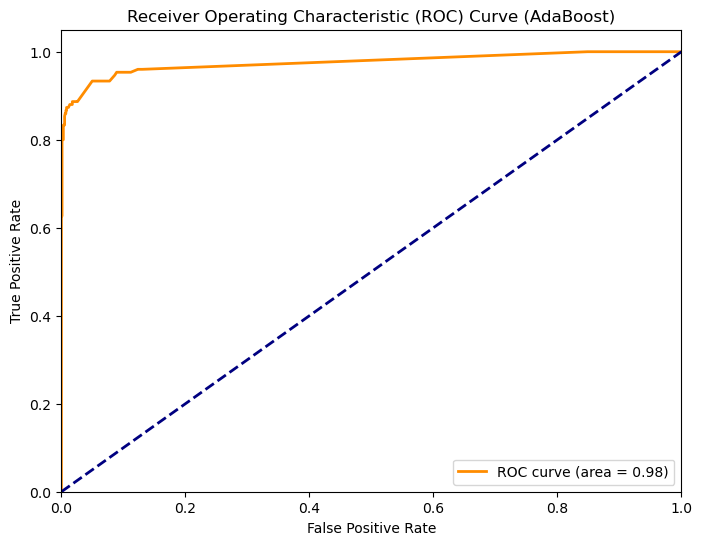

In [124]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (AdaBoost)')
plt.legend(loc="lower right")
plt.show()

# Gradient-Boost

In [125]:
# Load the data
df = pd.read_csv('spam.csv', encoding='latin-1')

In [126]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')]
    stemmer = PorterStemmer()
    text = ' '.join(words)
    return text

In [127]:
tqdm.pandas()
df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

In [128]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [129]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']

In [130]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Initialize and train the Gradient Boosting model
gradient_boost_classifier = GradientBoostingClassifier()
gradient_boost_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [132]:
# Make predictions on the test set
y_pred_gb = gradient_boost_classifier.predict(X_test)

In [133]:
# Calculate and print accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

Accuracy (Gradient Boosting): 0.9605381165919282


In [134]:
# Generate and print a classification report
report_gb = classification_report(y_test, y_pred_gb)
print(report_gb)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.96      0.73      0.83       150

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [135]:
# Generate a confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

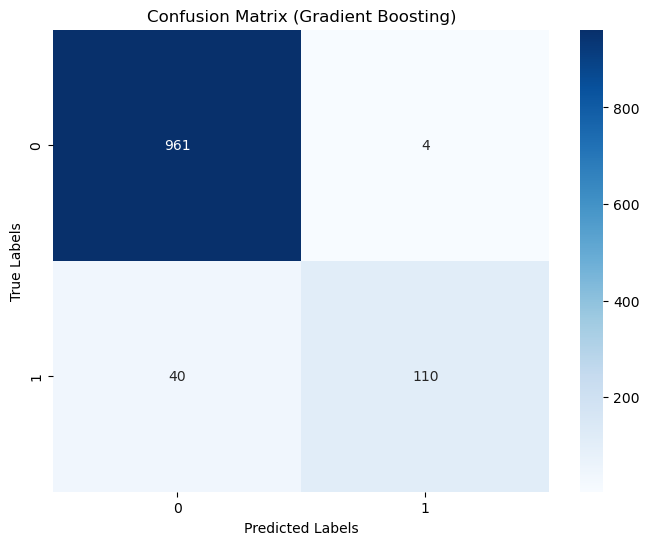

In [136]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()

In [137]:
# Generate ROC curve
y_pred_prob_gb = gradient_boost_classifier.decision_function(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

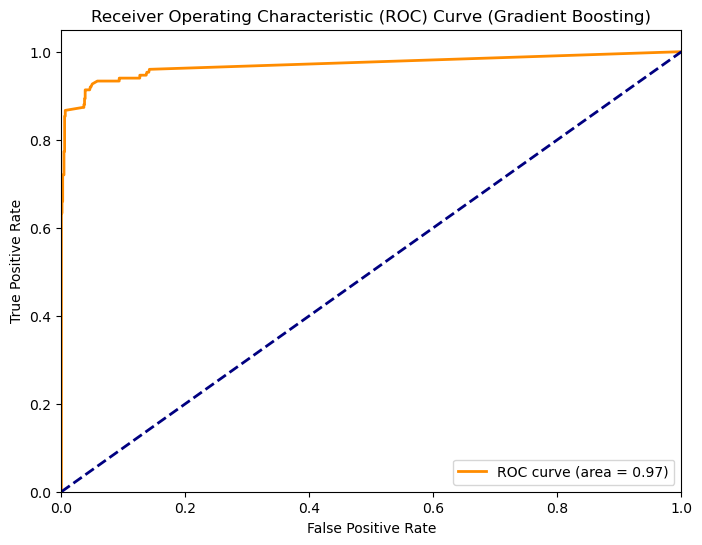

In [138]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

# Final Visualization

In [139]:
import matplotlib.pyplot as plt



In [140]:
# Define the algorithms and their corresponding values
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Tree', 'KNN', 'Random Forest', 'Ada Boost', 'Gradient Boost']
accuracy = [97, 98, 98, 97, 92, 97, 97, 96]
precision = [100, 90, 100, 94, 100, 100, 98, 96]
recall = [83, 94, 83, 84, 41, 81, 83, 73]



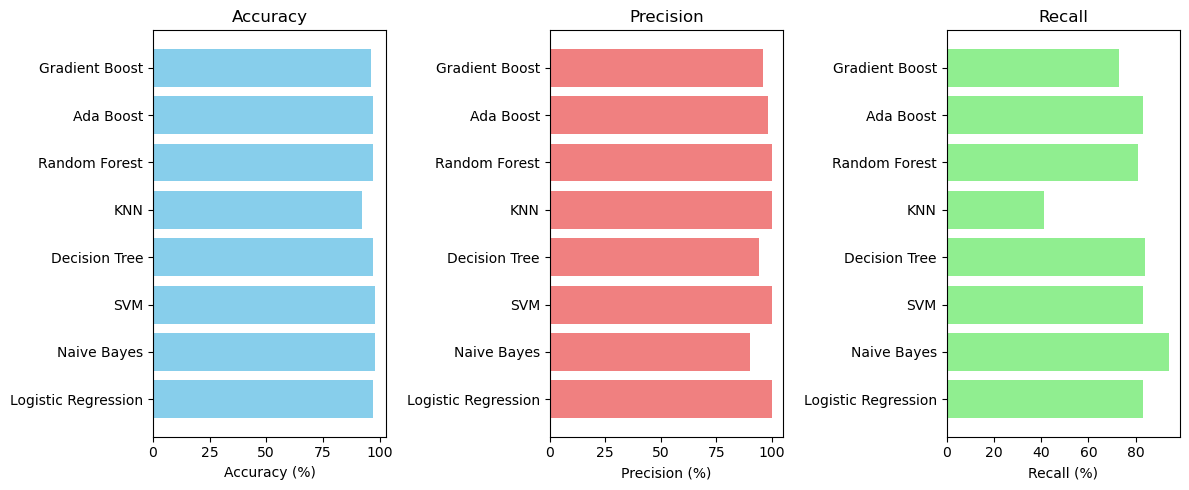

In [141]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
plt.barh(algorithms, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy')

plt.subplot(132)
plt.barh(algorithms, precision, color='lightcoral')
plt.xlabel('Precision (%)')
plt.title('Precision')

plt.subplot(133)
plt.barh(algorithms, recall, color='lightgreen')
plt.xlabel('Recall (%)')
plt.title('Recall')

plt.tight_layout()
plt.show()
